In [2]:
import numpy as np
import matplotlib.pylab as plt
from time import time
import scipy.integrate as sp

# solving the potential equation

## first the homogoneous case

N_iter 8263 delta_max 9.996551e-06
Total running time: 0.03 min
Code speed: 4196.8 iterations per second


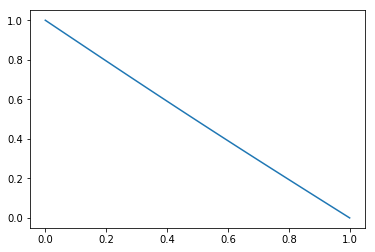

In [3]:
#Number of points 
N = 100

#Range 
x0 = 0 
x1 = 1

#create x array
x = np.linspace(x0,x1,N)

#Applied boundary potential phi0
phi0 = 1

#boundaries of potential at phi0 and 0 (ground)
phi = np.zeros(N)
phi[0] = phi0
phinew = phi.copy()

#make a fixed array 
fixed = np.zeros(N)
fixed[0] = 1
fixed[-1] = 1

#set accuracy
target_accuracy = 1e-5


# Keep track of the biggest update. 
# When this is smaller than our target accuracy, 
# we will stop iterating
delta_max = 1
delta_max_list = []

t1 = time()
while delta_max > target_accuracy:
    for i in range(N):
            if fixed[i]:
                phinew[i] = phi[i]
            else:
                phinew[i] = (phi[i+1] + phi[i-1]) / 2
    delta_max = np.max(np.abs(phinew-phi))
    delta_max_list.append(delta_max)
    print("N_iter %d delta_max %e\r" % (len(delta_max_list), delta_max), end='')
    # Now that we're done, phi becomes phinew. A sneaky trick: if we swap the two, 
    # we don't need to copy the whole array! 
    phi,phinew = phinew,phi
t2 = time()

print("\nTotal running time: %.2f min" % ((t2-t1)/60))
print("Code speed: %.1f iterations per second" %(len(delta_max_list)/(t2-t1)))

answer_13_1a_1 = phi.copy()
answer_13_1a_2 = delta_max_list.copy()

plt.plot(x,phi)
plt.show()